# **1. Connect GoogleDrive**

In [9]:
# from google.colab import drivep
# drive.mount('/content/gdrive/', force_remount=True)

# **2. UnZip the file**

In [10]:
# import zipfile
# z= zipfile.ZipFile('/content/gdrive/MyDrive/Chest_XRay_Dataset/ChestXRay.zip')
# z.extractall()

# !gdown --id 1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
# !unzip -q dogs-vs-cats.zip
# !unzip -q train.zip
# !unzip -q test1.zip

# **3. Import libraries**

In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

# **4. Image details**

In [2]:
image_channel = 3
image_width = 60
image_height = 60
input_size = (image_width,image_height,image_channel)

# **5. Covert datasets to pandas dataframe**

In [3]:
class FormData():
  def __init__(self,dir):
    self.dir = dir

  def convert_numerical_labels(self,df):
    df['class'] = df['class'].replace({1:'cat',0:'dog'})
    return df

  def dataframe_formation(self):
    filenames = os.listdir(self.dir)
    categories = []
    for i in range(len(filenames)):
      if 'dog' in filenames[i]:
        categories.append(0)
      else:
        categories.append(1)

    df = pd.DataFrame({
        'Filename':filenames,
        'class' : categories
    })
    return df

In [5]:
train_dir = 'dogs-vs-cats/train'
train_obj = FormData(train_dir)
training_df = train_obj.dataframe_formation()

In [6]:
print(training_df.head())
print(len(training_df))

       Filename  class
0     cat.0.jpg      1
1     cat.1.jpg      1
2    cat.10.jpg      1
3   cat.100.jpg      1
4  cat.1000.jpg      1
25000


# **5. Plot bar graph**

<Axes: >

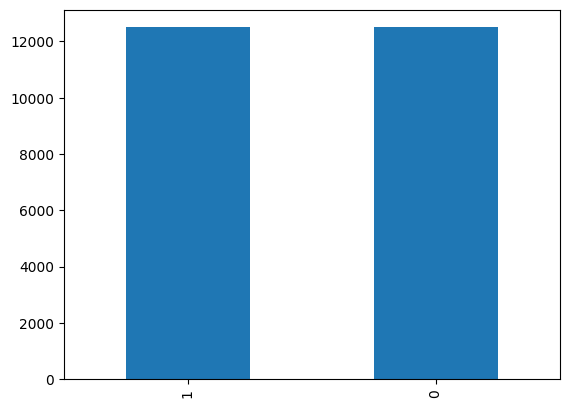

In [7]:
training_df['class'].value_counts().plot.bar()

# **6. Plot images with labels**

<class 'numpy.ndarray'>   (4, 4)
<class 'numpy.ndarray'>   (16,)


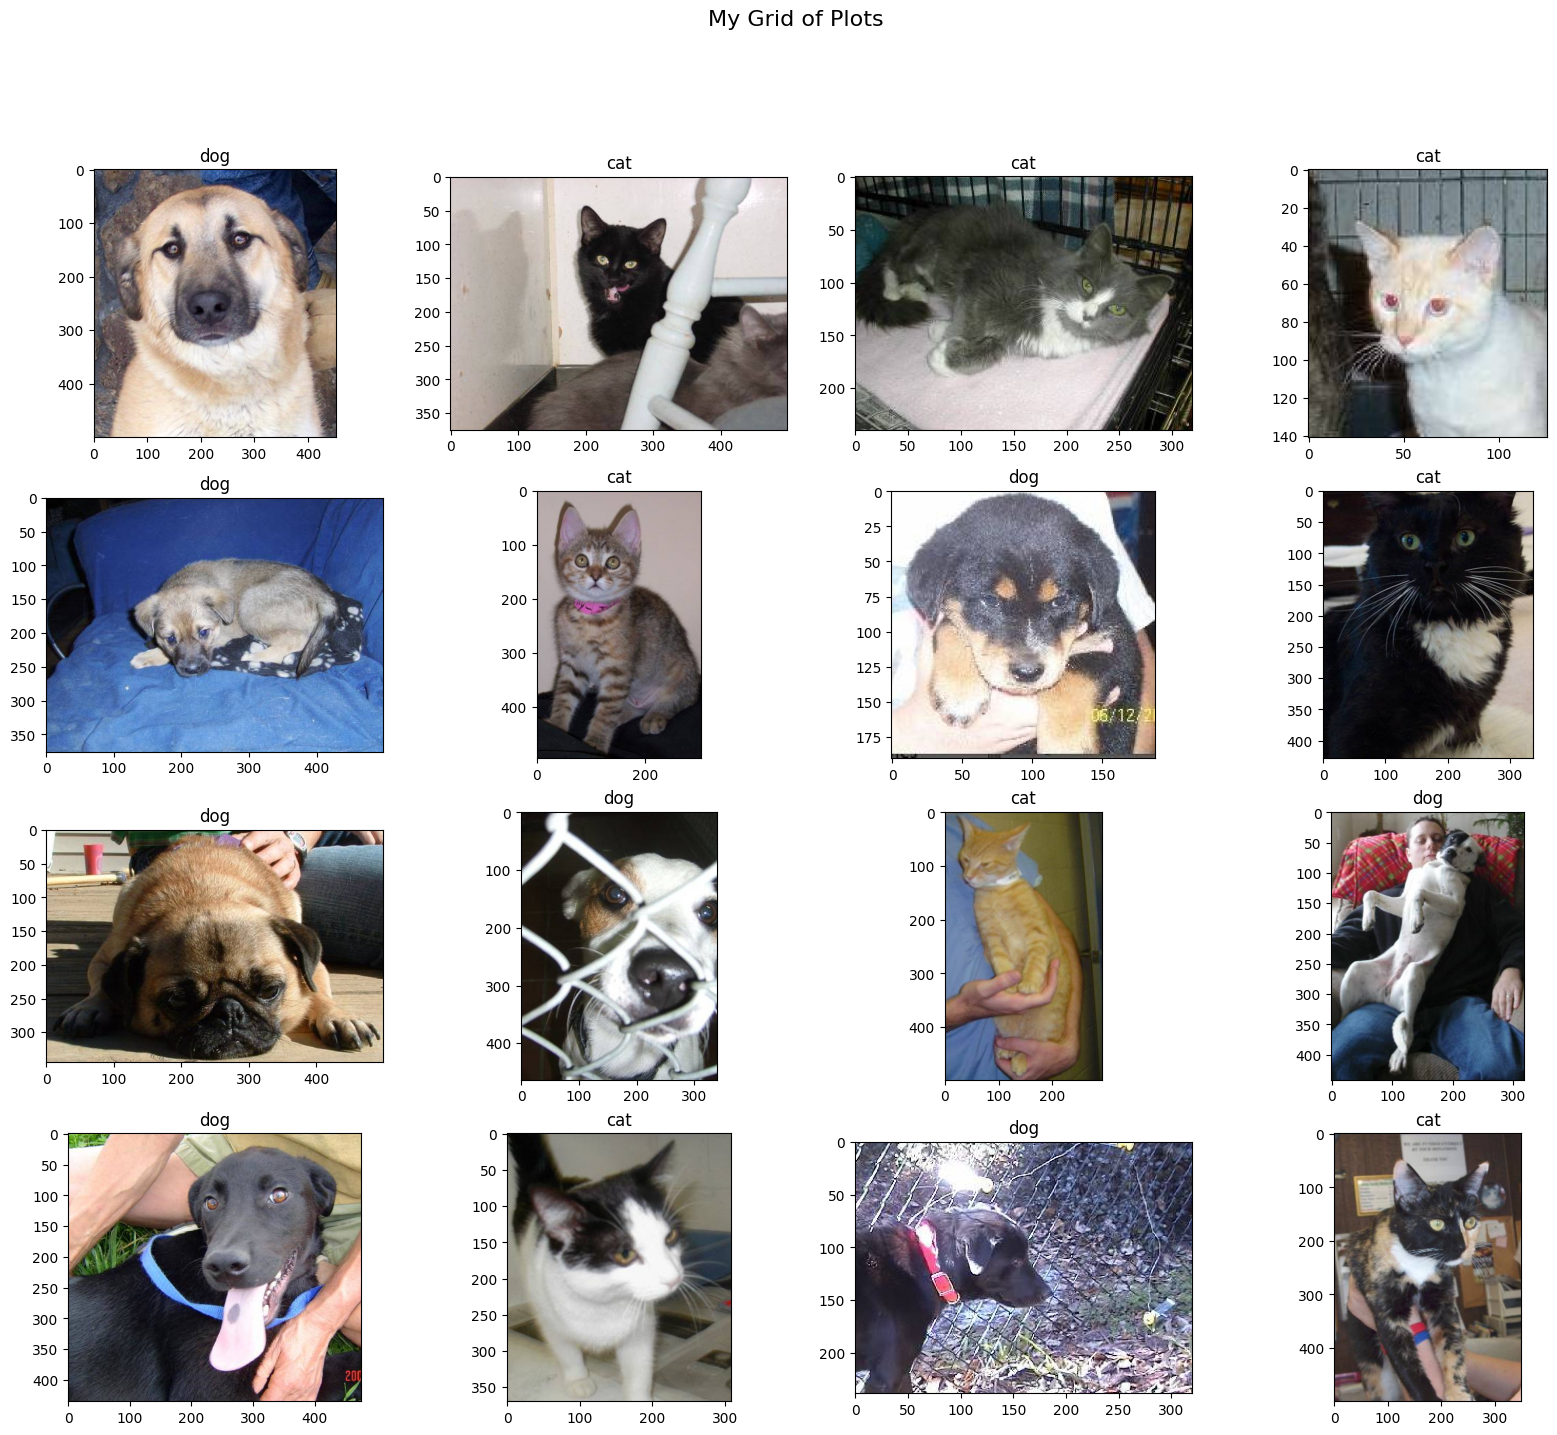

In [8]:
fig, axes = plt.subplots(4,4,figsize=(20,16))

print(type(axes),' ', axes.shape)

axes=axes.ravel()

print(type(axes),' ', axes.shape)

for i in np.arange(0,4*4):
    sample_row = training_df.sample(n=1).iloc[0]  # Get the row as a Series randomly
    image_path = os.path.join(train_dir,sample_row['Filename'])
    image = load_img(image_path)
    axes[i].imshow(image)
    if sample_row['class'] == 1:
        axes[i].set_title(f'cat')
    else:
        axes[i].set_title(f'dog')


fig.suptitle("My Grid of Plots", fontsize=16)  # Adds a title for the entire figure

plt.show()



# **7. Replace numerical labels with class name**

In [9]:
print(training_df)
training_df = train_obj.convert_numerical_labels(training_df)
print(training_df.head())

           Filename  class
0         cat.0.jpg      1
1         cat.1.jpg      1
2        cat.10.jpg      1
3       cat.100.jpg      1
4      cat.1000.jpg      1
...             ...    ...
24995  dog.9995.jpg      0
24996  dog.9996.jpg      0
24997  dog.9997.jpg      0
24998  dog.9998.jpg      0
24999  dog.9999.jpg      0

[25000 rows x 2 columns]
       Filename class
0     cat.0.jpg   cat
1     cat.1.jpg   cat
2    cat.10.jpg   cat
3   cat.100.jpg   cat
4  cat.1000.jpg   cat


# **8. Split image datasets and reset index**

In [10]:
train_df,val_df = train_test_split(training_df,test_size=0.20,random_state=7)

train_df_len = len(train_df)
val_df_len = len(val_df)

print(train_df_len)
print(val_df_len)

print('Before....')
print(train_df.head())
print('\n',val_df.head())

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

print('\nAfter.....')
print(train_df.head())
print('\n',val_df.head())


20000
5000
Before....
           Filename class
3253   cat.1676.jpg   cat
18789  dog.4408.jpg   dog
4466   cat.2768.jpg   cat
19269  dog.4840.jpg   dog
6527   cat.4622.jpg   cat

            Filename class
21752  dog.7075.jpg   dog
7208   cat.5235.jpg   cat
17058  dog.2850.jpg   dog
20754  dog.6177.jpg   dog
22505  dog.7753.jpg   dog

After.....
       Filename class
0  cat.1676.jpg   cat
1  dog.4408.jpg   dog
2  cat.2768.jpg   cat
3  dog.4840.jpg   dog
4  cat.4622.jpg   cat

        Filename class
0  dog.7075.jpg   dog
1  cat.5235.jpg   cat
2  dog.2850.jpg   dog
3  dog.6177.jpg   dog
4  dog.7753.jpg   dog


# **9. Create the Traindata loader**

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255.0)

traindata = train_datagen.flow_from_dataframe(
    train_df,
    train_dir,
    x_col = 'Filename',
    y_col = 'class',
    target_size = (60,60),
    class_mode = 'categorical',
    batch_size = batch_size
)
print(len(traindata))

Found 20000 validated image filenames belonging to 2 classes.
625


# **10. Create the validdata loader**

In [12]:
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

valdata = val_datagen.flow_from_dataframe(
    val_df,
    train_dir,
    x_col = 'Filename',
    y_col = 'class',
    target_size = (60,60),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 5000 validated image filenames belonging to 2 classes.


# **11. Plot images after dataloader**

{'cat': 0, 'dog': 1}
(32, 2)
(32, 60, 60, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


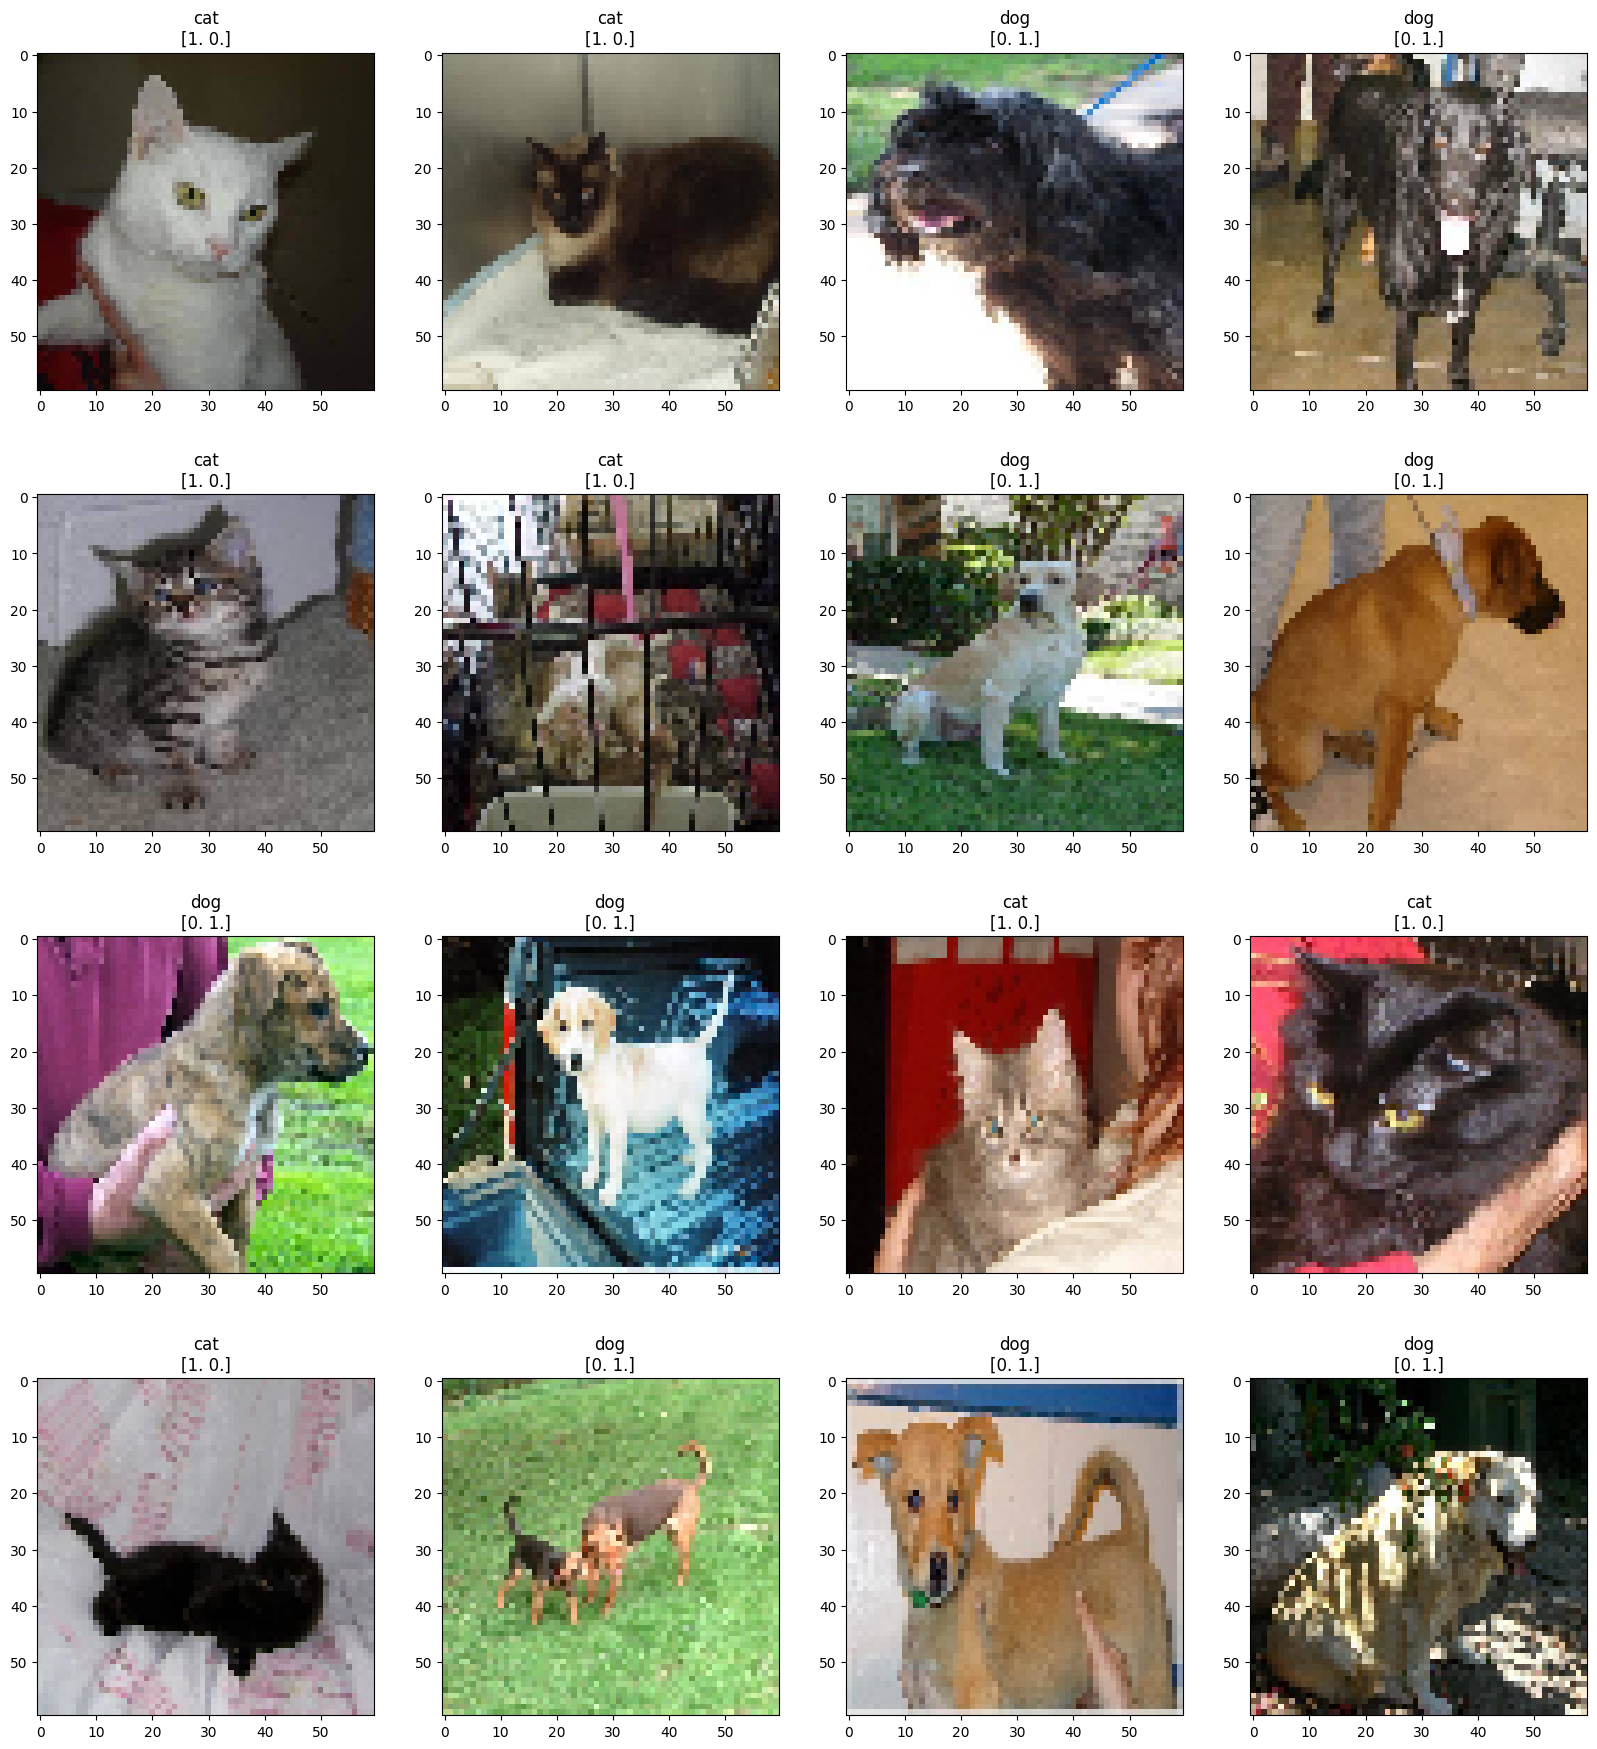

In [13]:
## [0. 1.] ==> argmax ==> 1 ==> dog
## [1. 0.] ==> argmax ==> 0 ==> cat

print(valdata.class_indices)

class_name = {0:'cat', 1:'dog'}

images,labels = next(traindata)

print(labels.shape)
print(images.shape)
print(type(labels))
print(type(images))

fig,axes = plt.subplots(4,4,figsize=(20,22))
axes = axes.ravel()

for i in np.arange(0,4*4):
    axes[i].imshow(images[i])
    index = np.argmax(labels[i])
    axes[i].set_title(f'{class_name[index]}\n{labels[i]}')

plt.show()

# **12. Create simple CNN model**

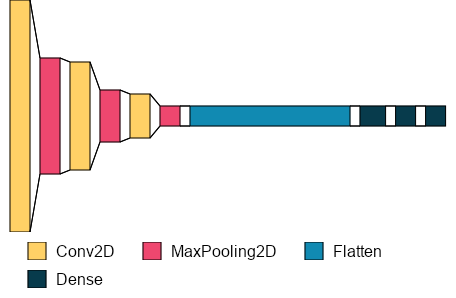

In [14]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_size))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0

# **13. Create callbacks**


In [16]:
chceckpoint = ModelCheckpoint(filepath = 'Cat_Dog_classfication_model.keras',
                              monitor = 'val_loss',
                              mode = 'min',
                              save_best_only = True,
                              verbose = 1)

earlystop = EarlyStopping(monitor='val_loss',
                          restore_best_weights = True,
                          verbose = 1,
                          patience = 5,
                          min_delta = 0)

In [17]:
callbacks = [earlystop,chceckpoint]

# **14. Fit the model**

In [18]:
print(val_df_len / batch_size) ## 5000 / 32 ==> 156*32 ==> 4992
print(np.ceil(val_df_len / batch_size))
print(int(np.ceil(val_df_len / batch_size)))

156.25
157.0
157


In [ ]:

epochs = 25
history = model.fit(traindata,
                    epochs = epochs,
                    callbacks = callbacks,
                    validation_data = valdata,
                    validation_steps = int(np.ceil(val_df_len / batch_size)),
                    steps_per_epoch = int(np.ceil(train_df_len / batch_size)))

Epoch 1/25
625/625 [==============================] - ETA: 0s - loss: 0.6145 - accuracy: 0.6479
Epoch 1: val_loss improved from inf to 0.53416, saving model to Cat_Dog_classfication_model.keras
625/625 [==============================] - 2349s 4s/step - loss: 0.6145 - accuracy: 0.6479 - val_loss: 0.5342 - val_accuracy: 0.7338
Epoch 2/25
625/625 [==============================] - ETA: 0s - loss: 0.5020 - accuracy: 0.7551
Epoch 2: val_loss improved from 0.53416 to 0.47061, saving model to Cat_Dog_classfication_model.keras
625/625 [==============================] - 535s 856ms/step - loss: 0.5020 - accuracy: 0.7551 - val_loss: 0.4706 - val_accuracy: 0.7754
Epoch 3/25
625/625 [==============================] - ETA: 0s - loss: 0.4424 - accuracy: 0.7921
Epoch 3: val_loss improved from 0.47061 to 0.43996, saving model to Cat_Dog_classfication_model.keras
625/625 [==============================] - 207s 331ms/step - loss: 0.4424 - accuracy: 0.7921 - val_loss: 0.4400 - val_accuracy: 0.7966
Epoch 4

# **15. Plot the graphs**

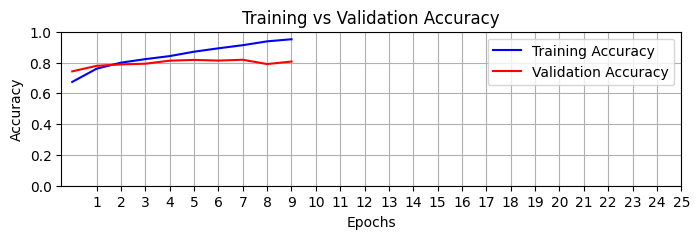

In [20]:
plt.figure(figsize=(8, 2))
plt.plot(history.history['accuracy'], label="Training Accuracy", color='b')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color='r')
plt.xticks(np.arange(1, epochs + 1, 1))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# **16. Prediction**

In [20]:
pred = model.predict(valdata,steps=int(np.ceil(5000/batch_size)))

157/157 [==============================] - 250s 2s/step


# **17. Modify the dataframe after prediction**

In [22]:
class_name = {1:'dog',0:'cat'}

val_df['predicted'] = np.argmax(pred, axis=-1)
val_df['confidence'] = np.max(pred, axis=-1)   
val_df['predicted'] = val_df['predicted'].replace(class_name)

images,labels = next(valdata)

print(pred.shape)
print(pred[0])
print(type(images[0]))
print(images[0])
print(val_df.head())
print(len(valdata)) #### (batch_size,60,60,3)

(5000, 2)
[0.09773121 0.9022688 ]
<class 'numpy.ndarray'>
[[[0.2392157  0.25882354 0.18039216]
  [0.05882353 0.05882353 0.02745098]
  [0.26666668 0.23137257 0.17254902]
  ...
  [0.5411765  0.54509807 0.5254902 ]
  [0.5372549  0.54509807 0.5411765 ]
  [0.5372549  0.53333336 0.5176471 ]]

 [[0.43921572 0.4156863  0.32156864]
  [0.02352941 0.03529412 0.05490196]
  [0.02352941 0.04313726 0.01960784]
  ...
  [0.5568628  0.58431375 0.5568628 ]
  [0.5568628  0.5647059  0.56078434]
  [0.5372549  0.5372549  0.5294118 ]]

 [[0.56078434 0.47450984 0.28235295]
  [0.1764706  0.1764706  0.13725491]
  [0.03921569 0.03921569 0.04705883]
  ...
  [0.40000004 0.43529415 0.42352945]
  [0.5686275  0.5764706  0.57254905]
  [0.49411768 0.50980395 0.5058824 ]]

 ...

 [[0.46274513 0.41176474 0.34901962]
  [0.48627454 0.43529415 0.37254903]
  [0.47058827 0.41960788 0.3529412 ]
  ...
  [0.41960788 0.36078432 0.28627452]
  [0.43137258 0.38431376 0.2901961 ]
  [0.4666667  0.40784317 0.31764707]]

 [[0.4784314  0.

# **18. PLot the images**

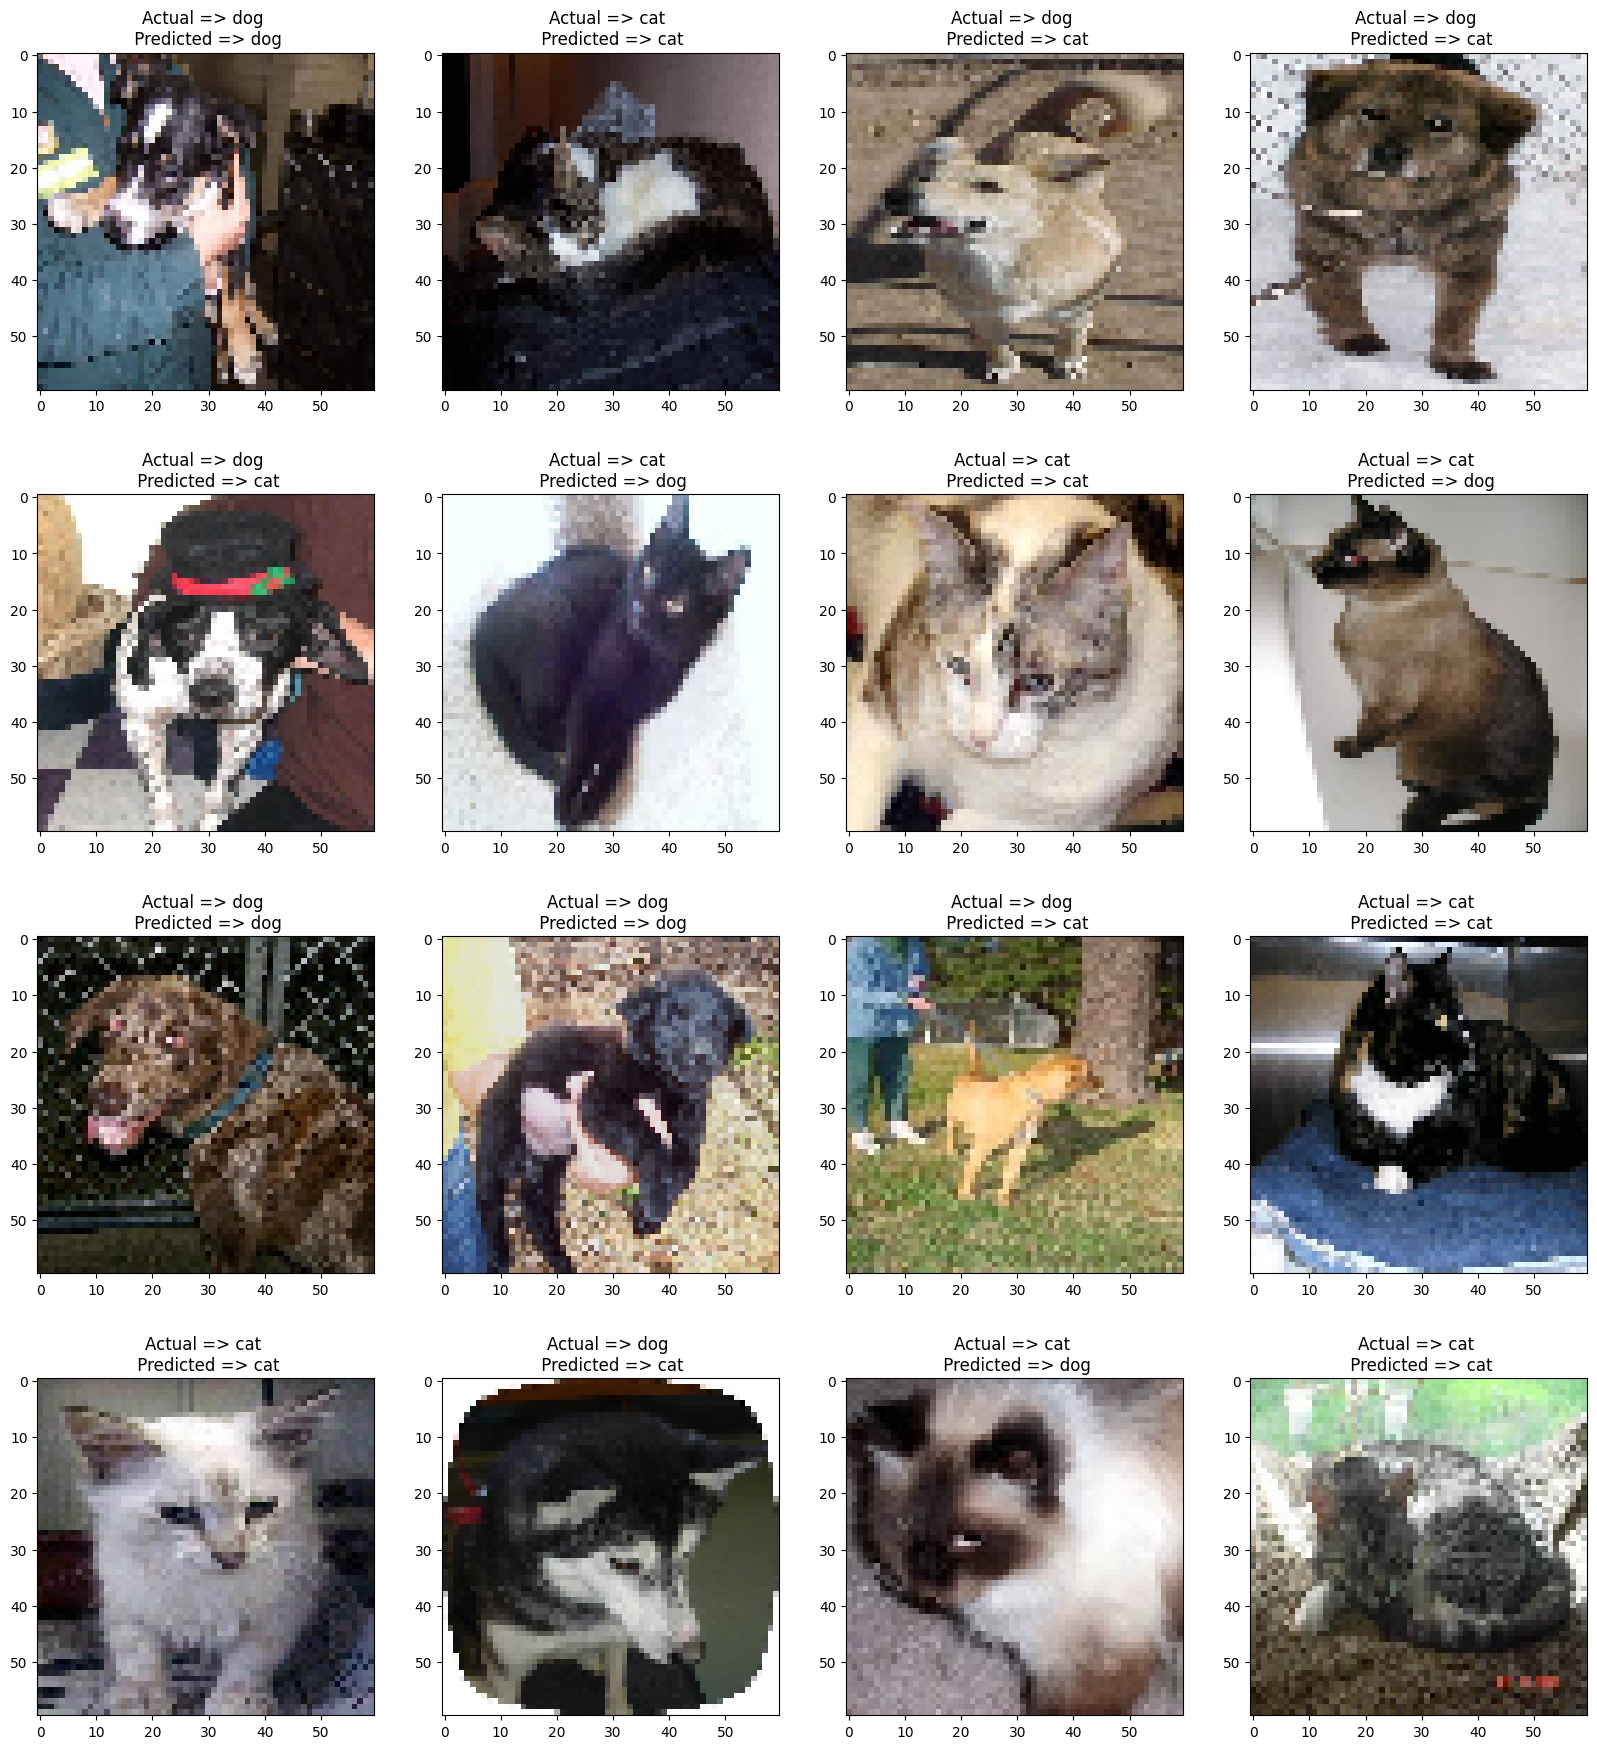

In [23]:
sample_test = val_df.head(16)
sample_test.head()

fig,axes = plt.subplots(4,4,figsize=(20,22))
axes=axes.ravel()

for i, row in sample_test.iterrows():
    filename = row['Filename']
    predicted = row['predicted']
    actual = row['class']
    # print(train_dir)
    image = load_img((train_dir + '/' +filename), target_size = input_size)
    axes[i].imshow(image)
    axes[i].set_title(f'Actual => {actual} \n Predicted => {predicted}')

plt.show()